# Regresión lineal

In [1]:
import pandas as pd
import numpy as np

from sklearn.feature_selection import RFE #recursive feature elimination
from sklearn.svm import SVR

from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("datasets/advertising.csv")
train, test = train_test_split(df, test_size = 0.2)

In [3]:
train.head()
# inversión en anuncios en los distintos medios, enfrentado a las ventas del producto

,TV,Radio,Newspaper,Sales
142,220.5,33.2,37.9,20.1
159,131.7,18.4,34.6,12.9
48,227.2,15.8,49.9,14.8
44,25.1,25.7,43.3,8.5
167,206.8,5.2,19.4,12.2


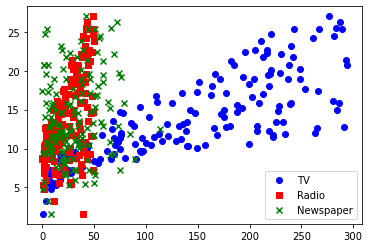

In [4]:
import matplotlib.pyplot as plt

plt.scatter(train["TV"],train["Sales"], c='b', marker='o', label='TV')
plt.scatter(train["Radio"],train["Sales"], c='r', marker='s', label='Radio')
plt.scatter(train["Newspaper"],train["Sales"], c='g', marker='x', label='Newspaper')
plt.legend(loc='lower right')
plt.show()

In [5]:
# separamos las variables predictoras y la variable a predecir

input_cols = ["TV", "Radio", "Newspaper"]

X_train = train[input_cols]
Y_train = train["Sales"] 

X_test = test[input_cols]
Y_test = test["Sales"]

## Selección de características relevantes

In [6]:
estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=2, step=1) #me quiero quedar con exactamente 2 variables en el modelo

# Creamos el modelo que mejor se ajusta a los datos elegidos
model = selector.fit(X_train, Y_train)

In [7]:
# Podemos ver cuales son las características de soporte que ha identificado como relevantes el modelo
# Aquellas en las que hay una correlación/dependencia más fuerte más fuerte con la variable de salida

model.support_ 
best_columns = np.array(input_cols)[np.array(model.support_)]
best_columns# = ["TV"]

array(['TV', 'Radio'], dtype='<U9')

In [8]:
model.ranking_
# Podemos consultar un ranking de cuales serían las siguientes más relevantes en caso de querer incluirlas

array([1, 1, 2])

## Predicción

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
lm = LinearRegression()
lm.fit(X_train[best_columns], Y_train)

LinearRegression()

In [11]:
## La recta del modelo está definida por los siguientes coeficientes
print("Donde corta el eje: " + str(lm.intercept_))
print("Coeficientes para cada característica: " + str(lm.coef_))

Donde corta el eje: 2.915838532108765
Coeficientes para cada característica: [0.04718277 0.18007514]


In [12]:
lm.score(X_train[best_columns], Y_train)
#R^2 ajustado en el conjunto de entrenamiento

0.9018780535593074

In [13]:
predicciones = lm.predict(X_test[best_columns])
df = X_test[best_columns].copy()
df["Real"] = Y_test
df["Prediccion"] = predicciones

df.head()

,TV,Radio,Real,Prediccion
81,239.8,4.1,12.3,14.968574
171,164.5,20.9,14.5,14.440974
102,280.2,10.1,14.8,17.955209
123,123.1,34.6,15.2,14.954637
152,197.6,23.3,16.6,16.434904


### R2, evaluación del modelo

In [14]:
lm.score(X_test[best_columns], Y_test)
#R^2 ajustado en el conjunto de test

0.8575912513459587

In [15]:
# si best_columns fuese una única dimension, podriamos representarlo en un grafico 2D

#plt.plot(X_test[best_columns],Y_test, "ro")
#plt.plot(X_test[best_columns], lm.predict(X_test[best_columns]), color="blue")